IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

KAMOUCHE Neïla et IKHENOUSSENE Yanis

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




## Exemples

In [17]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz as gv
import random
import math
import seaborn as sns
import sys
import copy
import tqdm
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initialisation des données


In [18]:
data_synthese   = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_etape      = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")

In [19]:
data_synthese[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328


In [20]:
data_ingredient[0:5]

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583


In [21]:
data_etape[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97


## À propos des bases de données

En nous renseignant sur Agribalyse, nous avons pu expliciter le but de ces bases de données et ainsi en déterminer l'usage que nous en feront.
(Remarque : en regardant attentivemenet avec un test, nous avons pu conclure que data_etape contenait data_synthese).
Nous avons compris que ces trois bases décrivaient l'impact environnemental des ingrédients de différentes manières :
- Data_Synthèse : Présente l'impact environnemental d'un aliment d'une manière générale
- Data_Ingredient : Présente des informations sur diverses ingrédients ainsi que leur impact environnemental
- Data_Etape : Présente l'impact environnemental des aliments d'une manière plus déatailée, notamment en explicitant les différents domaines (transport, agriculture, transformation...).

Commençons par l'apprentissage supervisé.


# Apprentissage Supervisé

## Problématique

Notre objectif ici est de développer un moyen de classification efficace afin de pouvoir classer les aliments selon leur impact environnemental (et ensuite les présenter aux consommateurs ou à des acheteurs par exemple). Qui dit algorithme de classification efficace dit évidemment accuracy élevée. Nous allons donc chercher à trouver l'algorithme d'apprentissage supervisé nous permettant de maximiser l'accuracy.

Afin d'avoir le système le plus performant et versatile possible, nous allons tenter, en plus d'avoir une bonne accuracy, de le faire avec le moins de données possibles. En effet, et c'est d'autant plus d'actualité avec la récente crise sanitaire, un manque d'informations dû à une pénurie peut arriver. C'est pourquoi nous voulons que notre algorithme soit le plus efficace possible.

Nous voulons mettre en évidence le traitement effectué sur un aliment selon son groupe (préparation, livraison, saisonnalité etc..). Ici, nous allons donc travailler avec des données catégorielles. Nous utiliserons dans un premier temps un arbre de décision catégoriel.
Nous traiterons les données suivantes :
- Saisonnalité
- Matériau d'emballage
- Préparation
- Livraison
- Transport par avion
- Sous-groupe d'aliment

## Première approche : apprentissage supervisé à l'aide d'un arbre de décision catégoriel


In [22]:
names_cat = ["Saisonnalité","Matériau d'emballage","Préparation","Livraison","Transport par avion (1 : par avion)","Sous-groupe d'aliment"]
synthese_df = data_synthese[names_cat]

synthese_arbre_desc = np.array(synthese_df)
synthese_arbre_label = np.array(data_synthese["Groupe d'aliment"])

#synthese_desc = np.array(pd.get_dummies(synthese_df))
#synthese_label = np.array(pd.get_dummies(data_synthese["Groupe d'aliment"]))

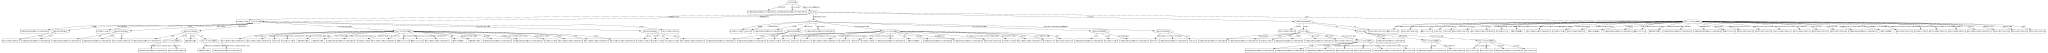

In [23]:
arbre_cat = cl.ClassifierArbreDecision(len(names_cat),0.0,names_cat)
arbre_cat.train(synthese_arbre_desc,synthese_arbre_label)
graph_cat = gv.Digraph(format='png')
arbre_cat.affiche(graph_cat)
graph_cat

In [24]:
#file = graph_cat.render(filename="arbre_cat") # pour enregistrer l'arbre

In [25]:
arbre_cat.accuracy(synthese_arbre_desc,synthese_arbre_label)

1.0

Nous obtenons un arbre difficilement analysable de par sa taille assez conséquente...
Remarque : augmenter la valeur d'epsilon (seuil de coupure) fait que nous avons un arbre beaucoup plus lisible et une interprétation des données bien plus simple et lisible. Néanmoins, cela a pour conséquence de drastiquement faire baisser l'accuracy et de réduire la visibilité du classement : 

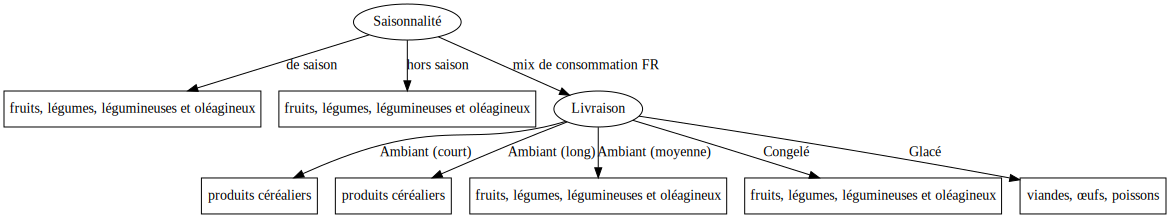

In [26]:
arbre_cat_lisible = cl.ClassifierArbreDecision(len(names_cat),2,names_cat)
arbre_cat_lisible.train(synthese_arbre_desc,synthese_arbre_label)
graph_cat_lisible = gv.Digraph(format='png')
arbre_cat_lisible.affiche(graph_cat_lisible)
graph_cat_lisible

In [27]:
file = graph_cat_lisible.render(filename="arbre_cat_lisible") # pour enregistrer l'arbre

In [28]:
arbre_cat_lisible.accuracy(synthese_arbre_desc,synthese_arbre_label)

0.4715611133521581

Nous choisissons donc pour nos tests, malgré son manque de lisibilité, l'arbre ayant la meilleure accuracy et donc celui ayant un epsilon égal à 0.0

## Quelques tests

#### Leave One Out

Comme nous n'avons pas de base de tests à disposition, nous allons nous servir de l'algorithme "Leave One Out" qui va nous permettre de tester la qualité de notre arbre de décision en retirant successivement un exemple de notre base et en faisant une prédiction dessus à l'aide d'un arbre entraîné sur le reste de la database. L'algorithme refait ça jusqu'à avoir testé tous les exemples (installez-vous confortablement, l'éxécution est longue !).

In [29]:
#ut.leave_one_out(arbre_cat,(synthese_arbre_desc,synthese_arbre_label))

#### CrossValidation

La CrossValidation va nous permettre de tester la fiabilité de notre arbre.

In [30]:
shuff = np.random.permutation(len(synthese_arbre_desc))
X_shuff = synthese_arbre_desc[shuff]
Y_shuff = synthese_arbre_label[shuff]

In [31]:
n = 10
val_acc_train = []
val_acc_test = []
for i in range(n) :
    X_train, Y_train, X_test, Y_test = ut.crossval_strat_multi_class(X_shuff, Y_shuff, n, i)
    arb = cl.ClassifierArbreDecision(len(names_cat), 0.0, names_cat)
    arb.train(X_train, Y_train)
    val_acc_train.append(arb.accuracy(X_train, Y_train))
    val_acc_test.append(arb.accuracy(X_test, Y_test))
    
print(val_acc_train)
print(val_acc_test)

	*** Warning: attribut  Sous-groupe d'aliment  -> Valeur inconnue:  sauces
	*** Warning: attribut  Sous-groupe d'aliment  -> Valeur inconnue:  légumes
	*** Warning: attribut  Sous-groupe d'aliment  -> Valeur inconnue:  légumes
	*** Warning: attribut  Sous-groupe d'aliment  -> Valeur inconnue:  sorbets
	*** Warning: attribut  Sous-groupe d'aliment  -> Valeur inconnue:  pâtes, riz et céréales
	*** Warning: attribut  Matériau d'emballage  -> Valeur inconnue:  PS
	*** Warning: attribut  Sous-groupe d'aliment  -> Valeur inconnue:  sauces
	*** Warning: attribut  Sous-groupe d'aliment  -> Valeur inconnue:  laits et boissons infantiles
	*** Warning: attribut  Sous-groupe d'aliment  -> Valeur inconnue:  laits et boissons infantiles
	*** Warning: attribut  Préparation  -> Valeur inconnue:  Four
	*** Warning: attribut  Matériau d'emballage  -> Valeur inconnue:  Pas d'emballage
	*** Warning: attribut  Préparation  -> Valeur inconnue:  Poêle
	*** Warning: attribut  Matériau d'emballage  -> Valeur i

Ici, nous remarquons que nous obtenons des warning. Cela peut se régler en "fusionnant" les colonnes des autres databases à synthese (notamment le label et la catégorie Sous-groupe d'aliment) afin d'avoir plus d'informations et d'avoir une analyse plus précise.

#### Affichage des accuracies 

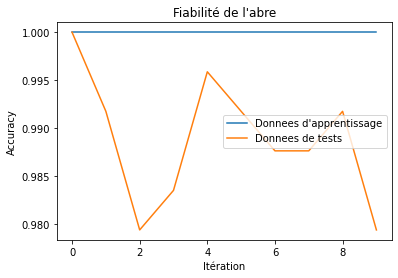

In [32]:
plt.plot(range(len(val_acc_train)), val_acc_train,label="Donnees d'apprentissage"        )  
plt.plot(range(len(val_acc_test)),  val_acc_test ,label="Donnees de tests" )  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.legend()
plt.title("Fiabilité de l'abre")
plt.show()

On obtient une accuract constante de 1.0 pour les données d'apprentissage ce qui n'est pas étonnant. Pour ce qui est des données de tests, nous pouvons remarquer que les résutats sont assez hétérogènes. On remarque une grande baisse de l'accuracy lors de la 4ème itération. Les meilleures accuracies sont obtenues aux itérations 3 et 8.

Malgré une plutôt bonne accuracy, cette dernière reste variable. En tant qu'analystes de données chevronnés, nous ne sommes pas satisfaits de cela et nous voulons tenter de pousser l'optimisation encore plus loin en tentant une deuxième approche.

## Deuxième approche : arbre de décision numérique

Les bases d'Agribalyse sont très complètes...peut-être un peu trop. En effet, elles contiennent beaucoup de valeurs et beaucoup de catégories différentes ce qui peut impacter la précision de notre algorithme. L'idée de cette deuxième approche est donc de réduire tout cela à un problème de classification binaire (que nous connaissons bien). En effet, rappelons aussi que nous voulons présenter nos données à des consommateurs qui ne sont pas forcément familiers avec des données aussi complexes. Nous allons donc :
- Attribuer un label égal à 1 aux aliments qui provoquent un faible impact environnemental
- Attribuer un label égal à -1 aux aliments qui provoquent un fort impact environnemental

L'importance de l'impact sera défini par rapport à la moyenne des colonnes. 

Pour déterminer l'impact environnemental d'un aliment, nous allons utiliser les colonnes suivantes :
- Changement Climatique
- Épuisement des ressources énergétiques (MJ/kg de produit)
- Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)

In [33]:
new_data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
new_data_synthese.columns

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'Saisonnalité',
       'Transport par avion (1 : par avion)', 'Livraison',
       'Matériau d'emballage', 'Préparation',
       'DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de p

In [34]:
names_facteurs = ["Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)","Changement climatique (kg CO2 eq/kg de produit)","Épuisement des ressources énergétiques (MJ/kg de produit)"]
new_data_synthese_df = new_data_synthese[names_facteurs]
new_data_synthese_desc = np.array(new_data_synthese_df)

In [35]:
moyenne_par_colonne = np.mean(new_data_synthese_desc,axis=0)
moyenne_par_colonne

array([ 9.05556643,  5.90975207, 53.48335725])

In [36]:
moyenne = np.mean(moyenne_par_colonne)
moyenne

22.816225251303482

#### Création des labels

Comme dit précedemment, nous allons classer les valeurs selon leur impact.

In [37]:
labels = []
for exemple in new_data_synthese_desc :
    if np.mean(exemple) >= moyenne :
        labels.append(-1)
    else :
        labels.append(1)
        
# Verification du bon deroulement de notre attribution de labels
if len(labels) == new_data_synthese_desc.shape[0] :
    print("OK")
#labels

OK


Dans la suite de notre analyse, nous n'allons conserver que les données numériques. Cela nous permettra (en plus de faciliter le traitement des données il est vrai) de dénoter avec la première approche uniquement catégorielle. 
Remarque : si nous avions voulu utiliser des données catégorielles et étant dans un contexte d'arbre numérique, il aurait fallu que nous utilisions l'Encodage One-Hot qui consiste, à l'aide de la fonction get_dummies de pandas, à transformer les données catégorielles en données numériques. Néanmoins, l'abondance de données ici aurait provoquer la création d'un nombre de colonnes bien trop élevé.

In [38]:
data_cat = new_data_synthese_df.columns[new_data_synthese_df.dtypes != type(object)] # Cela nous permettra d'avoir uniquement les données numériques
desc = [cat for cat in data_cat if cat != "Code CIQUAL"] # Pas pertinent ici, code ciqual étant un identifiant
data_desc_df = new_data_synthese_df[desc]

In [39]:
data_desc = np.array(data_desc_df)
data_label = np.array(labels)

Nous avons (enfin) toutes nos données ! Nous pouvons désormais utiliser notre arbre de décision numérique. Mais avant ça, profitons du fait d'avoir des données numériques pour faire quelque visualisations.

## Visualisation des données

#### À l'aide de seaborn

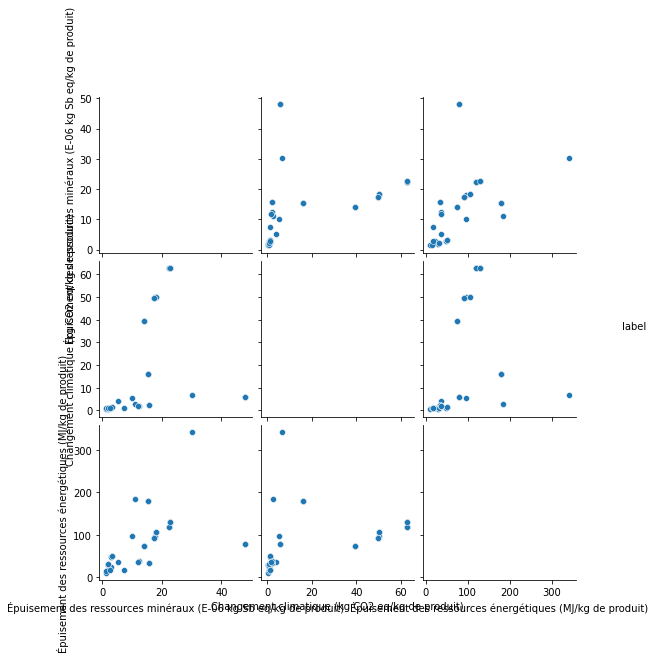

In [40]:
df_a = pd.DataFrame(np.array(labels), columns=['label'])
df_b = pd.concat([data_desc_df,df_a], ignore_index='True')

sns.pairplot(df_b[:50],hue='label',palette='bright')

#### En nuage de points

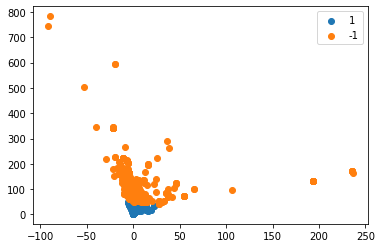

In [41]:
u,v = np.linalg.eig(data_desc.T @ data_desc) # Nous permet de calculer le vecteur propre
a,b = np.argsort(u)[-2:] # Permet de trier et de selectionner les 2 vecteurs associes aux 2 plus grandes valeurs propres

# Affichage des valeurs
vals_a = np.dot(data_desc, v.T[a])
vals_b = np.dot(data_desc, v.T[b])
plt.scatter(vals_a[data_label == 1], vals_b[data_label == 1])
plt.scatter(vals_a[data_label == -1], vals_b[data_label == -1])
plt.legend(['1','-1'])

Nous pouvons désormais passer à notre arbre numérique !

## Initialisation de l'arbre

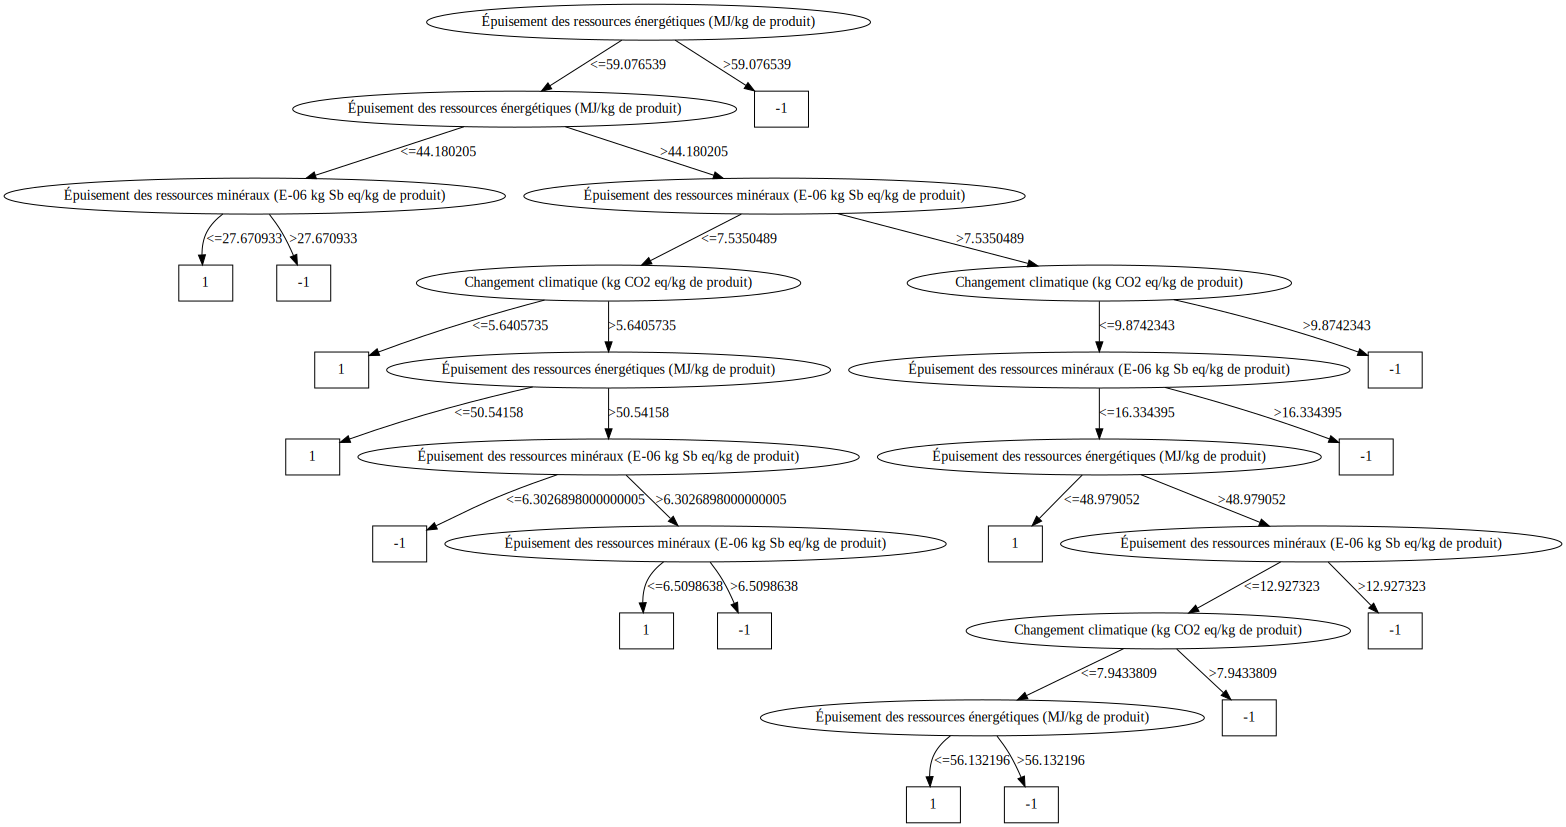

In [42]:
arbre_cat_num = cl.ClassifierArbreNumerique(len(data_cat),0.0,data_cat)
arbre_cat_num.train(data_desc,data_label)
graph_num = gv.Digraph(format='png')
arbre_cat_num.affiche(graph_num)
graph_num

In [43]:
file = graph_num.render(filename="arbre_num") # pour enregistrer l'arbre

Nous remarquons ici un arbre beaucoup plus compréhensible et lisible que les précédents. Nous comprenons assez facilement la manière dont il trie les aliments et les critères qu'il utilise.

## Quelques Tests

Testons notre arbre numérique afin de voir s'il est meilleur que le catégoriel.

#### Leave One Out

In [44]:
#ut.leave_one_out(arbre_cat_num,(data_desc,data_label))

#### CrossValidation

In [45]:
permut = np.random.permutation(len(data_desc))
X_shuff = data_desc [permut]
Y_shuff = data_label[permut]

In [53]:
n = 10
val_acc_train2 = []
val_acc_test2 = []
for i in range(n) :
    X_train, Y_train, X_test, Y_test = ut.crossval(X_shuff, Y_shuff, n, i)
    arb = cl.ClassifierArbreNumerique(len(data_cat), 0.0, data_cat)
    arb.train(X_train, Y_train)
    val_acc_train2.append(arb.accuracy(X_train, Y_train))
    val_acc_test2.append(arb.accuracy(X_test, Y_test))
    
    
print("val_acc_train  : ",val_acc_train2)
print("val_acc_test : ",val_acc_test2)

val_acc_train  :  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
val_acc_test :  [0.9959514170040485, 0.9919028340080972, 1.0, 0.9919028340080972, 0.9959514170040485, 0.9959514170040485, 1.0, 0.9959514170040485, 0.9757085020242915, 1.0]


Désormais, grâce à cette approche, nous n'avons plus de warning lors de la CrossValidation. Cela nous permet donc de dire que notre arbre est fiable, bien entraîné, que son classement des données est complet et qu'on lui en a donné assez lors de son entraînement. En effet, il est désormais capable de bien classer les données. De plus, nous remarquons ici de très très bonnes accuracies et très rapprochées les unes des autres. 

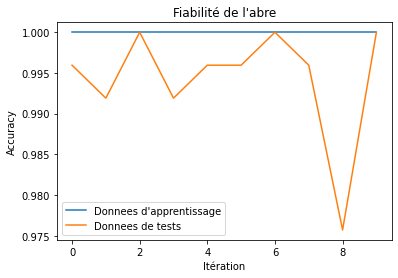

In [54]:
plt.plot(range(len(val_acc_train2)), val_acc_train2,label="Donnees d'apprentissage"        )  
plt.plot(range(len(val_acc_test2)),  val_acc_test2 ,label="Donnees de tests" )  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.legend()
plt.title("Fiabilité de l'abre")
plt.show()

À première vue, nous pourrions penser que les valeurs sont autant, voire plus ecartées que précédemment. Néanmoins, nous remarquons que la plage des données est plus petite. Nous avons donc réussi notre objectif. En effet, l'augmentation n'est pas spectaculaire mais la marge de progression n'était pas très grande. Nous avons donc, grâce à notre méthode, réussi à améliorer notre accuracy et à avoir un algorithme encore plus fiable et qui trie mieux (cf. crossval juste au dessus).

#### Robustesse et performance

In [55]:
print("Performances de l'arbre décisionnel numérique : " , ut.analyse_perfs(val_acc_test2))

Performances de l'arbre décisionnel numérique :  (0.9943319838056681, 4.6550508941303685e-05)


La grande moyenne nous confirme la robustesse de notre algorithme. La (très) faible variance nous montre que ce dernier est en plus de cela très performant.

## Conclusion

Nous en concluons que notre approche de simplification des labels dans un modèle binaire nous a permis de rendre notre algorithme plus fiable. Remarquons tout de même que cela se fait au détriment d'une précision de classement mais, dans notre cas, cela n'est pas primordial de par notre problématique qui consistait à présenter ces données à des personnes qui n'étaient pas familières avec les termes utilisés. Nos deux objectifs sont donc remplis. Nous pourrions réutiliser cette approche dans le cadre de présentation de produits bio par exemple ou dans un cadre de sensibilisation, toujours en gardant en tête que l'on s'adresse à une personne "lambda".

## 3ème approche: apprentissage non supervisé avec k moyens

Pour cette approche d'apprentissage non supervisé, nous allons utiliser l'algorithme des k moyens. L'intérêt est de regrouper des groupes d'aliments par leurs caractéristiques communes:

- Changement climatique (kg CO2 eq/kg de produit)
- Score unique EF (mPt/kg de produit)
- Épuisement des ressources eau (m3 depriv./kg de produit)
- Épuisement des ressources énergétiques (MJ/kg de produit)
- Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
- Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)
- Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)

A l'aide ces points communs, nous seront en mesure de trouver la corrélation entre eux.
La difficultée dans ce cas est que les groupes d'aliments sont des données non numériques. Pour y rémedier, on les convertit en créant autant de colonne que de groupes d'aliments en mettant la valeur à 1 quand l'aliment correspond à son groupe: c'est l'encodage one-hot.

In [56]:
# Récupération des colonnes souhaitées
names = ["Groupe d'aliment","Changement climatique (kg CO2 eq/kg de produit)","Score unique EF (mPt/kg de produit)","Épuisement des ressources eau (m3 depriv./kg de produit)","Épuisement des ressources énergétiques (MJ/kg de produit)","Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)","Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)","Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)"]

# Création du nouveau data avec les colonnes extraites
data_synthese_tri_df = data_synthese[names]

#Conversion des données non numériques
data_synthese_tri_df = pd.get_dummies(data_synthese_tri_df)

In [57]:
data_synthese_tri_df

,Changement climatique (kg CO2 eq/kg de produit),Score unique EF (mPt/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Groupe d'aliment_aides culinaires et ingrédients divers,Groupe d'aliment_aliments infantiles,Groupe d'aliment_boissons,Groupe d'aliment_entrées et plats composés,"Groupe d'aliment_fruits, légumes, légumineuses et oléagineux",Groupe d'aliment_glaces et sorbets,Groupe d'aliment_lait et produits laitiers,Groupe d'aliment_matières grasses,Groupe d'aliment_produits céréaliers,Groupe d'aliment_produits sucrés,"Groupe d'aliment_viandes, œufs, poissons"
0,1.221121,0.215366,1.630637,47.237697,2.938064,0.248176,62.195218,0,0,0,0,1,0,0,0,0,0,0
1,0.612234,0.128043,1.010960,29.397697,1.823726,0.153879,36.285914,0,0,0,0,1,0,0,0,0,0,0
2,1.221121,0.215366,1.630637,47.237697,2.938064,0.248176,62.195218,0,0,0,0,1,0,0,0,0,0,0
3,0.612234,0.128043,1.010960,29.397697,1.823726,0.153879,36.285914,0,0,0,0,1,0,0,0,0,0,0
4,0.861730,0.118929,1.412878,17.123820,2.173328,0.089663,41.957928,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,2.441307,0.351296,2.253106,26.865322,5.020883,0.789900,216.954380,0,0,0,0,0,0,1,0,0,0,0
2475,2.441674,0.239814,0.636518,25.746521,1.838004,0.157775,24.979408,0,0,0,0,0,0,1,0,0,0,0
2476,2.441674,0.239814,0.636518,25.746521,1.838004,0.157775,24.979408,0,0,0,0,0,0,1,0,0,0,0
2477,2.654791,0.260504,0.862339,27.136623,2.858934,0.178569,32.692803,0,0,0,0,0,0,1,0,0,0,0


Maintenant que la base est créée, on peut utiliser l'algorithme des k moyens. Au fur et à mesure que l'algorithme s'éxécute, on a accès à la différence des inerties à chaque itération.

On choisit une initialisation avec 10 exemples tirés de notre base. On prend également un epsilon à 500 et un iter_max à 100.
Remarque : si une valeur négative s'affiche et que l'on a qu'une seule ligne, relancer la création des bases et la fenêtre ci dessous (facteur aléatoire).

In [64]:
np.random.seed(42)

In [66]:
les_centres_e, l_affectation_e = clust.kmoyennes(10, data_synthese_tri_df, 500, 100)

iteration  0  Inertie :  28319781.11691725  Difference :  2807643.8525477536
iteration  1  Inertie :  25028636.27688214  Difference :  3291144.840035107
iteration  2  Inertie :  21575485.84537937  Difference :  3453150.4315027706
iteration  3  Inertie :  19832541.549114328  Difference :  1742944.2962650433
iteration  4  Inertie :  18097812.310486194  Difference :  1734729.2386281341
iteration  5  Inertie :  16920913.945060108  Difference :  1176898.365426086
iteration  6  Inertie :  16243326.933742449  Difference :  677587.0113176592
iteration  7  Inertie :  15005930.12808668  Difference :  1237396.8056557681
iteration  8  Inertie :  14045182.630074069  Difference :  960747.4980126116
iteration  9  Inertie :  13748977.731907213  Difference :  296204.8981668558
iteration  10  Inertie :  13432124.513406089  Difference :  316853.21850112453
iteration  11  Inertie :  12754191.138223449  Difference :  677933.3751826398
iteration  12  Inertie :  11933662.054537222  Difference :  820529.08368

Nombre de clusters:  10


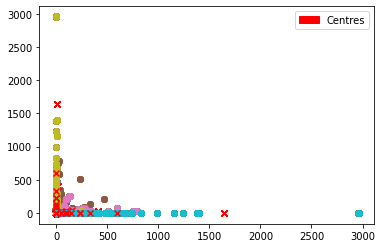

In [68]:
clust.affiche_resultat(data_synthese_tri_df,les_centres_e, l_affectation_e)
print("Nombre de clusters: ", len(les_centres_e))

On observe donc l'obtention de 10 centres, ce qui signifie que l'on a 10 groupes d'aliments qui ont des caractéristiques communes.
En revanche avec une telle base, on ne peut pas bien distinguer les 10 clusters visuellement. 
On décide donc de prendre un échantillon de cette base.

In [69]:
echantillon = [i for i in range(len(data_synthese_tri_df))]
index = cl.tirage(echantillon,50,False)
echantillon = data_synthese_tri_df.iloc[index]

In [70]:
#Affichage de la nouvelle base
echantillon

,Changement climatique (kg CO2 eq/kg de produit),Score unique EF (mPt/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Groupe d'aliment_aides culinaires et ingrédients divers,Groupe d'aliment_aliments infantiles,Groupe d'aliment_boissons,Groupe d'aliment_entrées et plats composés,"Groupe d'aliment_fruits, légumes, légumineuses et oléagineux",Groupe d'aliment_glaces et sorbets,Groupe d'aliment_lait et produits laitiers,Groupe d'aliment_matières grasses,Groupe d'aliment_produits céréaliers,Groupe d'aliment_produits sucrés,"Groupe d'aliment_viandes, œufs, poissons"
2072,28.735466,2.449831,6.072712,87.938377,11.915180,0.694505,233.883320,0,0,0,1,0,0,0,0,0,0,0
2131,8.927701,0.770854,7.037236,53.942197,13.104388,0.425948,105.669920,1,0,0,0,0,0,0,0,0,0,0
2159,7.259028,1.140221,6.369649,132.586500,9.696751,0.720860,175.228280,0,0,0,0,0,0,0,0,0,0,1
919,3.016015,0.434531,3.025183,59.076539,5.482535,0.330802,86.167961,0,0,0,1,0,0,0,0,0,0,0
524,1.111939,0.136876,0.371408,28.771829,2.496308,0.175760,12.787698,0,0,0,0,1,0,0,0,0,0,0
2057,4.099545,0.562685,3.354007,62.016187,5.629859,0.363847,86.053627,0,0,0,1,0,0,0,0,0,0,0
896,0.442407,0.062603,0.103587,7.501482,1.378996,0.059588,21.039113,0,0,0,0,1,0,0,0,0,0,0
178,3.395406,0.464195,4.556982,31.103062,7.752247,0.819389,241.912180,0,0,0,0,0,0,0,0,1,0,0
2153,1.284906,0.209038,3.527405,31.259948,5.782164,0.197799,82.619316,1,0,0,0,0,0,0,0,0,0,0
608,5.146704,0.761175,5.164657,75.922450,8.118199,0.532236,143.790550,0,0,0,0,0,0,0,0,0,0,1


Pour cet echantillon, la valeur de iter_max ne change pas. En revanche, on diminue le nombre d'exemples tirés à 3 et epsilon à 10.
Ici aussi, il se peut qu'il faille relancer la fenêtre, néanmoins l'execution est beaucoup plus rapide.

In [71]:
les_centres_e_ech, l_affectation_e_ech = clust.kmoyennes(3, echantillon, 10, 100)

iteration  0  Inertie :  154252.86898019398  Difference :  50022.947218752786
iteration  1  Inertie :  135514.38756520522  Difference :  18738.481414988753
iteration  2  Inertie :  130955.15445439219  Difference :  4559.233110813031
iteration  3  Inertie :  127930.63977145126  Difference :  3024.514682940935
iteration  4  Inertie :  126136.75034658857  Difference :  1793.8894248626893
iteration  5  Inertie :  123149.60743605239  Difference :  2987.142910536175
iteration  6  Inertie :  122774.80986641793  Difference :  374.7975696344656
iteration  7  Inertie :  122774.80986641793  Difference :  0.0


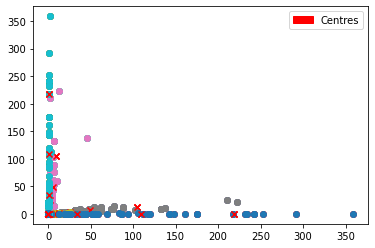

In [72]:
clust.affiche_resultat(echantillon,les_centres_e_ech, l_affectation_e_ech)

Grâce à cet echantillon, on arrive plus facilement à discerner les 10 centres. Néanmoins, nous avons plus de centres que prévu...En effet, nous ne voulions avoir que 3 centres mais on nous en affiche 10. Nous n'avons pas pu déterminer l'origine de ce problème mais cela ne nous empêche tout de même pas d'analyser certains éléments.
Le choix du K peut être un inconvenient dans notre cas, car le choix n'est pas évident et il faut donc tatonner. De plus, si on lance deux fois l'algorithme on aura des résultats complétement différents vu que l'initialisation est basée sur du tirage aléatoire.
On en déduit que cet algorithme est assez illisible et peu analysable.

## 4ème approche: apprentissage non supervisé avec clustering hierarchique

Pour réaliser l'aprentissage non supervisée avec clustering hiérarchique, nous allons utiliser la même base que pour k moyens.
La difficultée dans notre cas est le temps d'éxecution extrêmement long, pouvant aller jusqu'à plusieurs heures. Pour ce faire, nous allons utliser le même échantillon utilisé avec k moyen dans la deuxième partie.

On choisit donc d'afficher uniquement le dendogramme car les données sont trop importantes pour être affichées.

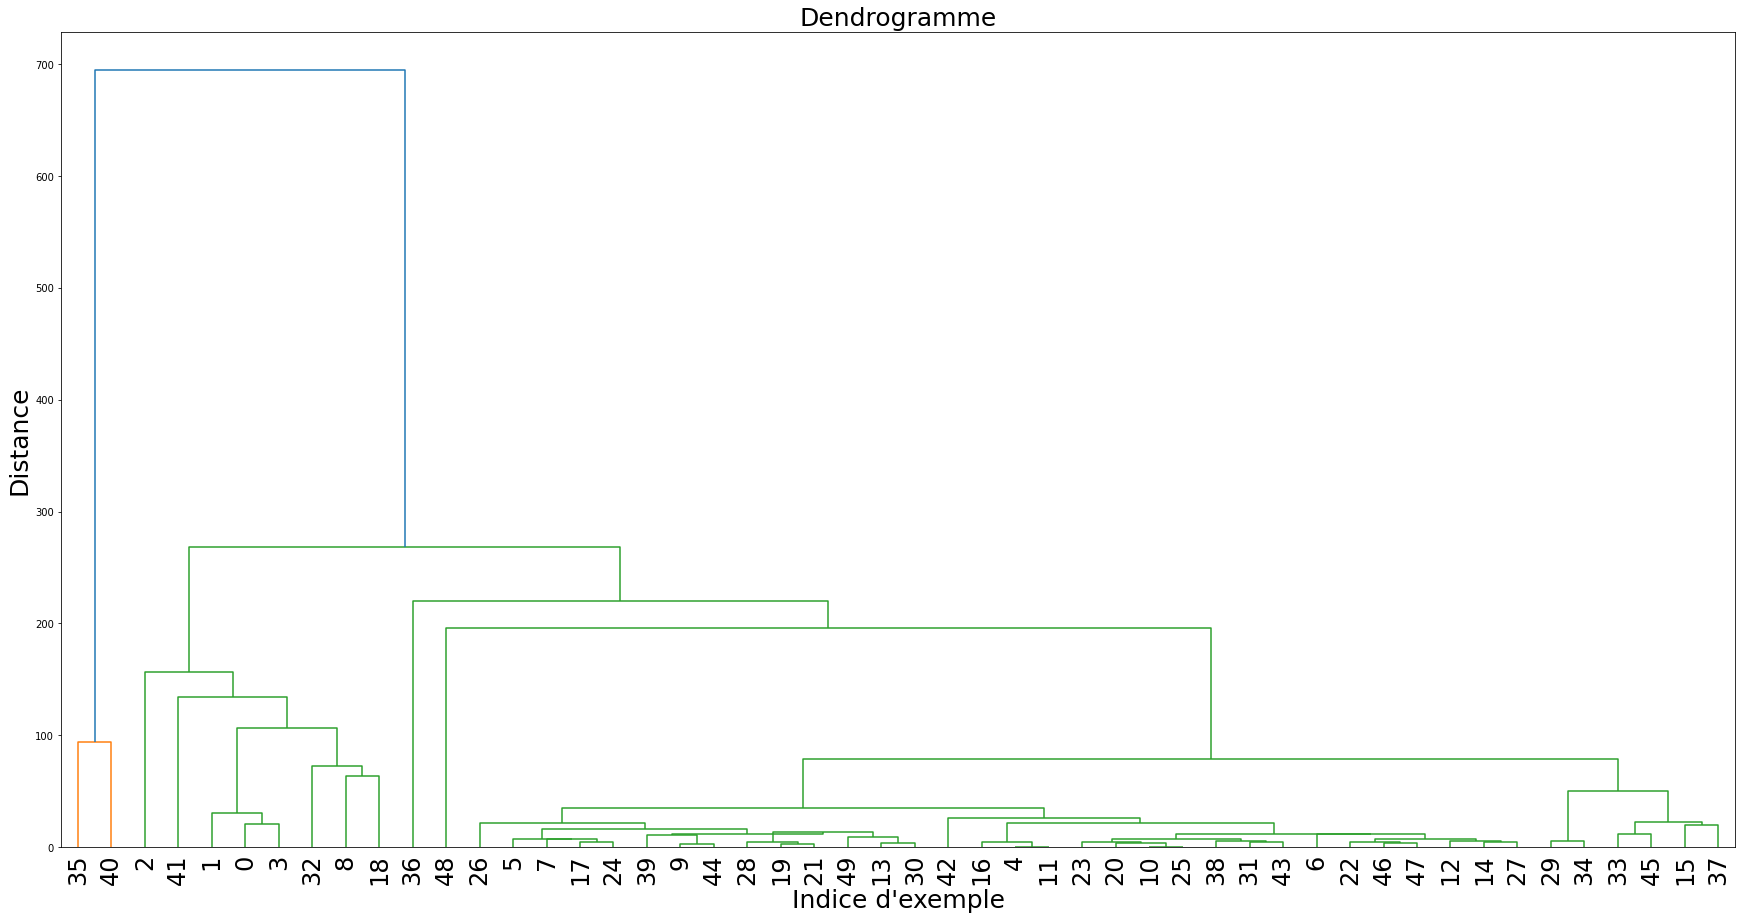

In [45]:
liste_dendo = clust.clustering_hierarchique(echantillon,verbose=False,dendrogramme=True)

Les indices du dendogramme n'étant pas parlant par rapport à notre base, on choisit d'afficher les groupes d'aliments correspondants.

In [46]:
col = echantillon.columns
liste_groupe = []
for i in range(50):
    for j in range(len(echantillon.columns)):
        if echantillon.iloc[i,j] == 1:
            liste_groupe.append(col[j])
print(np.array(liste_groupe))

["Groupe d'aliment_viandes, œufs, poissons"
 "Groupe d'aliment_viandes, œufs, poissons"
 "Groupe d'aliment_viandes, œufs, poissons"
 "Groupe d'aliment_viandes, œufs, poissons" "Groupe d'aliment_boissons"
 "Groupe d'aliment_aides culinaires et ingrédients divers"
 "Groupe d'aliment_fruits, légumes, légumineuses et oléagineux"
 "Groupe d'aliment_entrées et plats composés"
 "Groupe d'aliment_viandes, œufs, poissons"
 "Groupe d'aliment_fruits, légumes, légumineuses et oléagineux"
 "Groupe d'aliment_fruits, légumes, légumineuses et oléagineux"
 "Groupe d'aliment_boissons"
 "Groupe d'aliment_fruits, légumes, légumineuses et oléagineux"
 "Groupe d'aliment_produits céréaliers"
 "Groupe d'aliment_produits céréaliers"
 "Groupe d'aliment_matières grasses" "Groupe d'aliment_boissons"
 "Groupe d'aliment_aides culinaires et ingrédients divers"
 "Groupe d'aliment_matières grasses"
 "Groupe d'aliment_fruits, légumes, légumineuses et oléagineux"
 "Groupe d'aliment_boissons"
 "Groupe d'aliment_fruits, l

Grâce au dendogramme, on a une meilleure vision des données ayant des caratéristiques communes.On voit bien que le dendogramme met en avant 2 groupes bien distincts, même si on voit que le 1er groupe semble se séparer en deux. 
En revanche, il aurait été intéressant de pouvoir étudier toute la base mais cela demanderai une puissance de calcul et une capacité de stockage colossale.

## Conclusion
En conclusion, on voit bien que les deux apprentissages nous permettent de mettre en évidence les groupes de données communes mais de manières différentes. L'apprentissage à utiliser dépend donc des graphiques que l'on souhaite obtenir.
L'algorithme k moyens est donc un très bon apprentissage pour visualiser les groupes de données mais dès qu'on a une base trop important cela devient vite illisible.
L'algorithme de clustering hierarchique permet également de mettre en lumières les données communes mais est impossible à réaliser pour des bases à très nombreuses données. Le seul moyen de l'utiliser est donc d'échantilloner sa base.